In [2]:
import numpy as np
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

# Problem 1

Mean of X1: 3.9931613673
Mean of X2: 4.73286920276
Covariance of X1, X2:
[[  4.79649173   2.53993265]
 [  2.53993265  10.51889781]]
Eigenvalues of covariance matrix: [  3.83176472  11.48362481]
Eigenvectors of covariance matrix:
[[-0.93483825 -0.35507387]
 [ 0.35507387 -0.93483825]]
Transposed eigenvectors of covariance matrix:
[[-0.93483825  0.35507387]
 [-0.35507387 -0.93483825]]


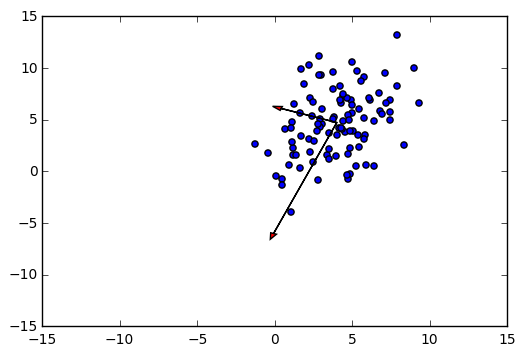

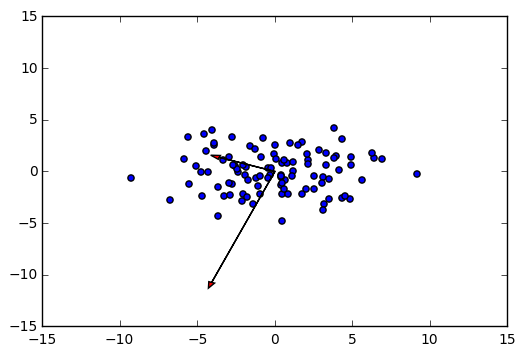

In [3]:
x1 = np.random.normal(4, 2, 100)
x2 = 0.5*x1 + np.random.normal(3, 3, 100)

### Part (a) ###
### Compute the mean of the sampled data ###
mean1 = np.mean(x1)
mean2 = np.mean(x2)
print("Mean of X1: " + str(mean1))
print("Mean of X2: " + str(mean2))

### Part (b) ###
### Compute the covariance matrix of the sampled data ###
cov = np.cov(x1, x2)
print("Covariance of X1, X2:\n" + str(cov))

### Part (c) ###
### Compute the eigenvectors and eigenvalues of this covariance matrix ###
w, x = LA.eig(cov)
print("Eigenvalues of covariance matrix: " + str(w))
print("Eigenvectors of covariance matrix:\n" + str(x))
v = x.transpose()
print("Transposed eigenvectors of covariance matrix:\n" + str(v))

### Part (d) ###
### Plot data points and eigenvectors ###

fig, ax = plt.subplots()
ax.scatter(x1, x2)
ax.arrow(mean1, mean2, w[0] * v[0][0], w[0] * v[0][1], head_width=0.4, head_length=0.6, fc='r', ec='k')
ax.arrow(mean1, mean2, w[1] * v[1][0], w[1] * v[1][1], head_width=0.4, head_length=0.6, fc='r', ec='k')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

### Part (e) ###
### Rotate into eigenvector space ###
x_mu = [(x1 - mean1), (x2 - mean2)]
U = np.matrix([v[1], v[0]])
U_t = U.transpose()

x_rot = np.dot(U_t, x_mu)
fig, ax = plt.subplots()
ax.scatter(x_rot[0], x_rot[1])
ax.arrow(0, 0, w[0] * v[0][0], w[0] * v[0][1], head_width=0.4, head_length=0.6, fc='r', ec='k')
ax.arrow(0, 0, w[1] * v[1][0], w[1] * v[1][1], head_width=0.4, head_length=0.6, fc='r', ec='k')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

# Problem 3

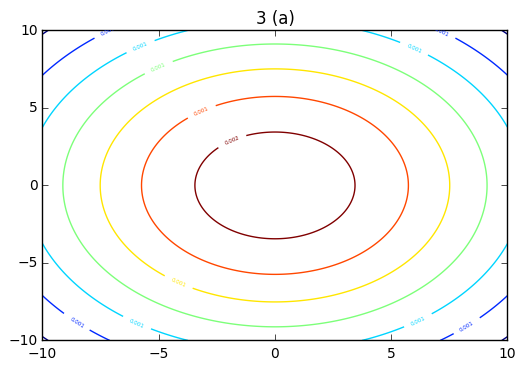

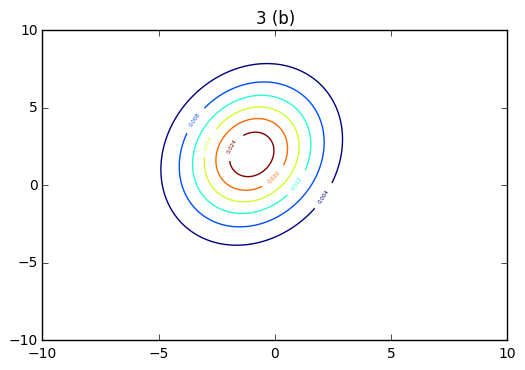

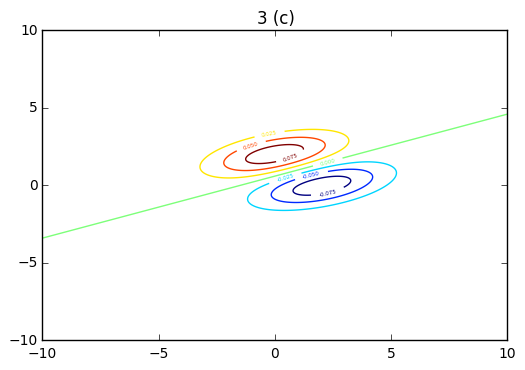

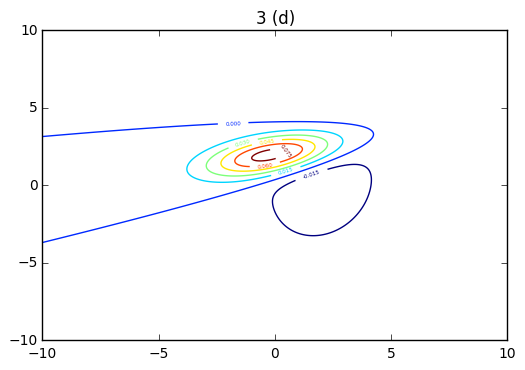

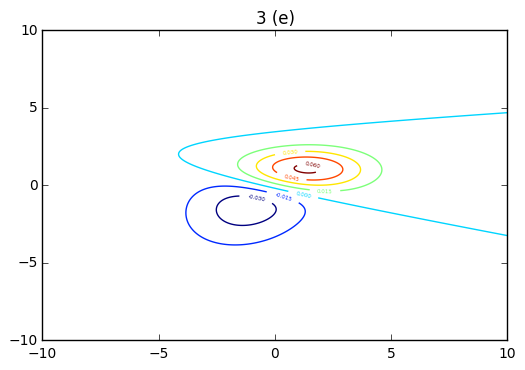

In [10]:
def iso_plot(problem, mux, muy, sigmax, sigmay, sigmaxy):
    delta = 0.015

    x = np.arange(-10, 10, delta)
    y = np.arange(-10, 10, delta)
    X, Y = np.meshgrid(x, y)
    Z = matplotlib.mlab.bivariate_normal(X, Y, sigmax, sigmay, mux, muy, sigmaxy)

    plt.figure()
    CS = plt.contour(X, Y, Z)
    plt.clabel(CS, inline=1, fontsize=4)
    plt.title('3 (' + problem + ')')

def iso_diff_plot(problem, mux1, muy1, sigmax1, sigmay1, sigmaxy1,
                    mux2, muy2, sigmax2, sigmay2, sigmaxy2):
    delta = 0.015

    x = np.arange(-10, 10, delta)
    y = np.arange(-10, 10, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = matplotlib.mlab.bivariate_normal(X, Y, sigmax1, sigmay1, mux1, muy1, sigmaxy1)
    Z2 = matplotlib.mlab.bivariate_normal(X, Y, sigmax2, sigmay2, mux2, muy2, sigmaxy2)
    Z = Z1 - Z2

    plt.figure()
    CS = plt.contour(X, Y, Z)
    plt.clabel(CS, inline=1, fontsize=4)
    plt.title('3 (' + problem + ')')

### Part (a) ###
iso_plot('a', 0, 0, 10, 10, 0)

### Part (b) ###
iso_plot('b', -1, 2, 2, 3, 1)

### Part (c) ###
iso_diff_plot('c', 0, 2, 2, 1, 1, 2, 0, 2, 1, 1)

### Part (d) ###
iso_diff_plot('d', 0, 2, 2, 1, 1, 2, 0, 2, 3, 1)

### Part (e) ###
iso_diff_plot('e', 1, 1, 2, 1, 0, -1, -1, 2, 2, 1)
